# Assignment 1


# Task 1

## a)

Randomly choose 50 text documents from the BBC data set. It is a news article dataset, originating from BBC News, provided for the use as benchmarks for machine learning research.

In [1]:
# load the data (test)

doc = open('BBC/sport/001.txt', encoding='utf8')

# - D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in 
#   Kernel Document Clustering", Proc. ICML 2006.

In [ ]:
text=doc.read()
print(text)

In [3]:
docs_sport = []  # Initialize a list to store the contents of each document

for i in range(1, 11):  # Loop from 1 to 10
    file_name = f'BBC/sport/{i:03d}.txt'  # Generate file name with leading zeros
    with open(file_name, encoding='utf8') as f:  # Open file
        docs_sport.append(f.read())  # Read and store the file content
        
docs_tech = [] 

for i in range(1, 11):
    file_name = f'BBC/tech/{i:03d}.txt'  
    with open(file_name, encoding='utf8') as f:  
        docs_tech.append(f.read())    
        
docs_business = [] 

for i in range(1, 11):
    file_name = f'BBC/business/{i:03d}.txt'  
    with open(file_name, encoding='utf8') as f:  
        docs_business.append(f.read())  
        
        
docs_entertainment = [] 

for i in range(1, 11):
    file_name = f'BBC/entertainment/{i:03d}.txt'  
    with open(file_name, encoding='utf8') as f:  
        docs_entertainment.append(f.read()) 
        
        
docs_politics = [] 

for i in range(1, 11):
    file_name = f'BBC/politics/{i:03d}.txt'  
    with open(file_name, encoding='utf8') as f:  
        docs_politics.append(f.read()) 
        
all_docs = docs_sport+docs_tech+docs_business+docs_entertainment+docs_politics

I know this is not completely random, however i feel like its random enough to be able to make analysis from this data. 

In [4]:
print(
    len(docs_sport),
    len(docs_tech),
    len(docs_business),
    len(docs_entertainment),
    len(docs_politics),
    len(all_docs)
)

10 10 10 10 10 50


## b)

prepare each document (tokenization, lowercasing, ignoring stop-words and punctuation marks, lemmatization),

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
import re


In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

additional_punctuations = '‘’“”...—' # I had some touble with these characters so i will add them manually  
x = "'s"
all_punctuations = string.punctuation + additional_punctuations + x


# Function to preprocess documents
def preprocess(doc):
    # Tokenize and lowercase
    tokens = word_tokenize(doc.lower())
    # Remove punctuation using regex and check for stop words
    processed_tokens = [
        lemmatizer.lemmatize(token) 
        for token in tokens 
        if not re.fullmatch('[' + all_punctuations + ']+', token) 
        and token not in stop_words
    ]
    return processed_tokens


# Preprocess all documents in each category
docs_sport_processed = [preprocess(doc) for doc in docs_sport]
docs_tech_processed = [preprocess(doc) for doc in docs_tech]
docs_business_processed = [preprocess(doc) for doc in docs_business]
docs_entertainment_processed = [preprocess(doc) for doc in docs_entertainment]
docs_politics_processed = [preprocess(doc) for doc in docs_politics]

# Combine all processed documents into one list
all_docs_processed = docs_sport_processed + docs_tech_processed + docs_business_processed + docs_entertainment_processed + docs_politics_processed


## c)

draw a plot presenting the relation in (1)

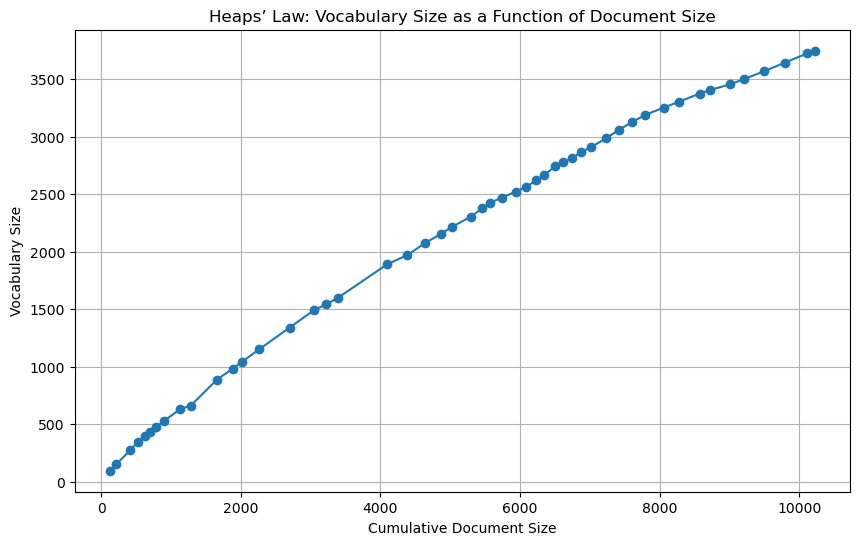

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the list of all processed tokens to calculate cumulative document sizes and vocabulary sizes
all_tokens_flat = [token for doc in all_docs_processed for token in doc]
cumulative_doc_sizes = np.cumsum([len(doc) for doc in all_docs_processed])
vocabulary_sizes = [len(set(all_tokens_flat[:index])) for index in cumulative_doc_sizes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_doc_sizes, vocabulary_sizes, marker='o')
plt.xlabel('Cumulative Document Size')
plt.ylabel('Vocabulary Size')
plt.title('Heaps’ Law: Vocabulary Size as a Function of Document Size')
plt.grid(True)
plt.show()


The plot above illustrate Heaps Law, which is an empirical law that describes the relationship between the size of a text corpus (in terms of the number of words) and the number of distinct words (vocabulary size) within that corpus.

From this plot, you can observe that as the cumulative document size increases (x-axis), the vocabulary size (y-axis) also increases, but it does so at a decelerating rate. This is typical of Heaps' Law, which posits that the number of distinct words in a document (vocabulary size) will grow less rapidly than the size of the document itself.

The curve suggests a sub-linear growth, meaning that as more text is added to the document, fewer new words are introduced. Initially, when the document size is small, new words are added quite quickly. However, as the document grows, the likelihood of new words appearing decreases, because many words will already have been used.

## d)

Estimate a and b Using Least Squares Method

In [8]:
from scipy.stats import linregress

# Taking logarithms
log_cumulative_doc_sizes = np.log(cumulative_doc_sizes)
log_vocabulary_sizes = np.log(vocabulary_sizes)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_cumulative_doc_sizes, log_vocabulary_sizes)

# Convert intercept and slope back to a and b for the original Heaps' Law equation
a = np.exp(intercept)
b = slope

print(f"Estimated values: a = {a}, b = {b}")


Estimated values: a = 1.8392139677830979, b = 0.8310246391056446


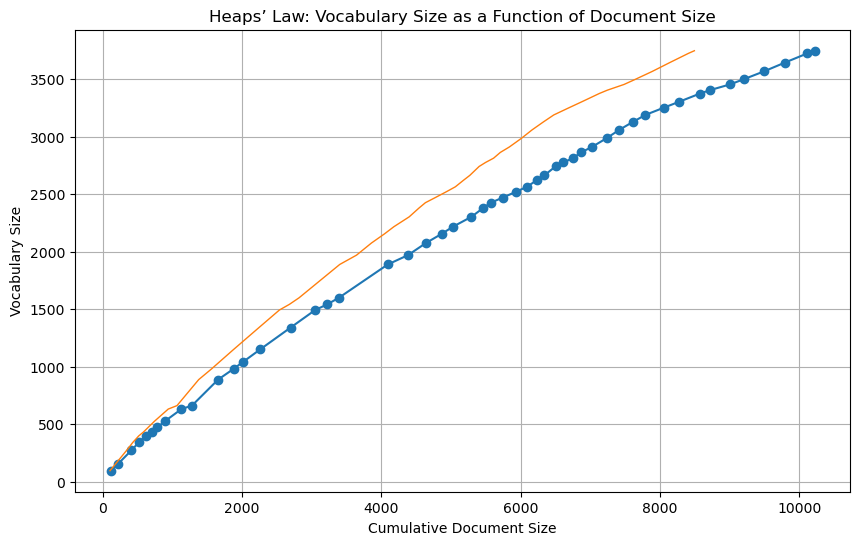

In [9]:
f = lambda x: a+x*b

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_doc_sizes, vocabulary_sizes, marker='o')
plt.xlabel('Cumulative Document Size')
plt.ylabel('Vocabulary Size')
plt.title('Heaps’ Law: Vocabulary Size as a Function of Document Size')
plt.grid(True)
plt.plot(f(cumulative_doc_sizes),vocabulary_sizes, linewidth=1)
plt.show()


The orange line is the estimet for for our corpus and it follows the Heaps Law quite well

# Task 2

The Zipf's law

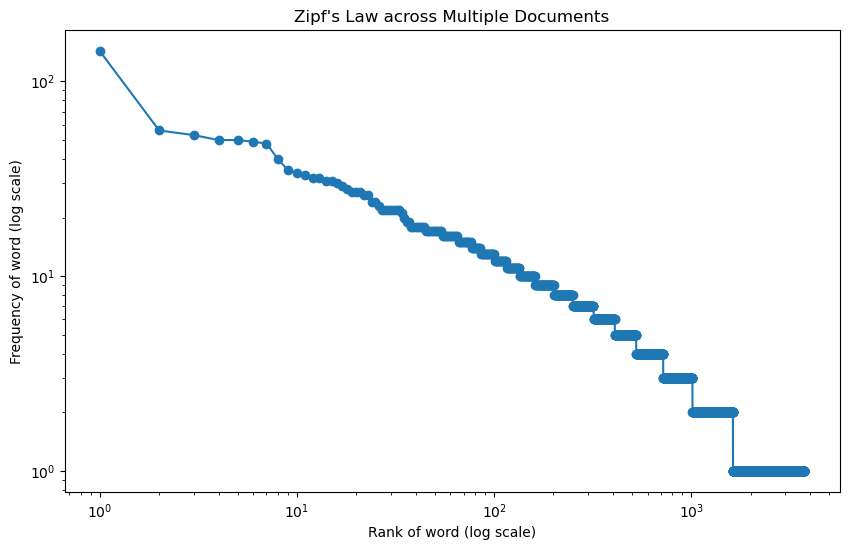

In [10]:
from collections import Counter

combined_text = ' '.join(' '.join(doc) if isinstance(doc, list) else doc.lower() for doc in all_docs_processed)

# Tokenize the combined text into words and count their frequencies
word_counts = Counter(combined_text.split())

# Get the frequencies sorted in descending order and their corresponding ranks
frequencies = sorted(word_counts.values(), reverse=True)
ranks = range(1, len(frequencies) + 1)

# Plotting on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker="o")
plt.title('Zipf\'s Law across Multiple Documents')
plt.xlabel('Rank of word (log scale)')
plt.ylabel('Frequency of word (log scale)')

# Show the plot
plt.show()

Zipf's Law is an empirical rule that suggests that the frequency of any word is inversely proportional to its rank in the frequency table. Thus, the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, and so on.

Linear Relationship: The relationship between the log rank and log frequency of words appears roughly linear, which is what Zipf's Law would predict. This linearity in a log-log plot indicates a power-law distribution of word frequencies.

Steep Decline: The frequency of words drops rapidly with the rank. The most common words are very frequent, and the frequency diminishes quickly as you move down the ranks.

Tail Off: At the end of the plot, there's a tail that deviates from the linear trend. This is common in empirical data and can be due to a variety of factors, such as the presence of many low-frequency words that only appear once or twice across all documents (hapax legomena).

In [11]:
# Get the 5 most common words and their frequencies 
top_5_words = word_counts.most_common(5)

In [12]:
# Fit a line to the log-log data
log_ranks = np.log(ranks)
log_freqs = np.log(frequencies)
slope, intercept = np.polyfit(log_ranks, log_freqs, 1)

# The slope should be close to -1 for a true Zipfian distribution
# and the intercept is the log(c)
print(f"Estimated slope (should be close to -1 for Zipf's law): {slope}")
print(f"Estimated intercept (log(c)): {intercept}")

# To get c from the intercept
estimated_c = np.exp(intercept)
print(f"Estimated c: {estimated_c}")


Estimated slope (should be close to -1 for Zipf's law): -0.7644813856590961
Estimated intercept (log(c)): 6.096064307919965
Estimated c: 444.1064597576701


The corpus does not follow Zipf's Law perfectly. This could be due to several reasons, such as the nature of the text (e.g., it might not be natural language), the size of the corpus (perhaps too small to exhibit Zipfian properties), or other linguistic factors.

The c value provides a scaling factor for the distribution; however, since the slope is not close to -1, the word frequencies in the corpus do not decrease as quickly as a Zipfian distribution would predict as you move from the most frequent word to less frequent words.

# Task 3

The TF-IDF representation.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_docs_joined = [' '.join(doc) for doc in all_docs_processed]

# Now we can create the TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the joined documents
tfidf_matrix = tfidf_vectorizer.fit_transform(all_docs_joined)

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum tf-idf weighting by word
word_tfidf_sum = tfidf_matrix.sum(axis=0)

# Create a DataFrame with the scores
df_word_scores = pd.DataFrame(word_tfidf_sum.T, index=feature_names, columns=["TFIDF"])

# Sort the DataFrame by score in descending order
df_word_scores_sorted = df_word_scores.sort_values(by=["TFIDF"], ascending=False)

# Get the top 5 words
top_5_words_tfidf = df_word_scores_sorted.head(5)

top_5_words_tfidf 

,TFIDF
said,2.218476
year,1.615695
woman,1.603570
mr,1.446464
world,1.287101


In [14]:
# Print the table header
print(f"{'Rank':<5} {'Word':<10} {'Frequency':<10}")

# Print the top 5 words and their frequencies
for rank, (word, frequency) in enumerate(top_5_words, start=1):
    print(f"{rank:<5} {word:<10} {frequency:<10}")

Rank  Word       Frequency 
1     said       143       
2     year       56        
3     mr         53        
4     also       50        
5     would      50        


"said" and "year" are both at the top for each method and "mr" is in the top 5 words for both methods. Rest of the words are not the same. The TF-IDF meathod has "woman" and world in its top 5 words and Zipfs law ranks "also" and "would" in its top 5 words. You can see a differance in both methods however it seams like the come to the same conclusion for the majority of the words. 